# Bankrupcy Prediction

## Imports

In [1]:
import os
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, ExtraTreesClassifier
from sklearn.neural_network import MLPClassifier
from sklearn import metrics
import matplotlib.pyplot as plt
import graphviz

## Load data

In [2]:
filename = "company_info.xlsx"
folder = "./"
file_path = os.path.join(folder, filename)
df1 = pd.read_excel(file_path, engine="openpyxl", sheet_name=0)
df2 = pd.read_excel(file_path, engine="openpyxl", sheet_name=1)

df = pd.concat([df1, df2])

## Data Exploration

Typical data exploration tasks:
- dataset size (samples, features)
- variables without values
- description, column statistics

Data size

In [3]:
print("Shape:{}".format(df.shape))

Shape:(11601, 32)


Description

In [4]:
print("DESCRIBE:{}".format(df.describe(include="all")))

DESCRIBE:          Unnamed: 0 Country ISO code     Situation  \
count   11601.000000            11601  11601.000000   
unique           NaN                2           NaN   
top              NaN               ES           NaN   
freq             NaN             9118           NaN   
mean     5977.275924              NaN      0.890699   
std      3483.470948              NaN      0.312030   
min         1.000000              NaN      0.000000   
25%      2950.000000              NaN      1.000000   
50%      5953.000000              NaN      1.000000   
75%      8956.000000              NaN      1.000000   
max     12287.000000              NaN      1.000000   

        NACE Rev. 2, core code (4 digits)  X1=Equity/Assets  \
count                             11601.0      11601.000000   
unique                                NaN               NaN   
top                                   NaN               NaN   
freq                                  NaN               NaN   
mean           

Info

In [5]:
print("INFO:{}".format(df.info))

INFO:<bound method DataFrame.info of       Unnamed: 0 Country ISO code  Situation  \
0            1.0               ES          1   
1            2.0               ES          1   
2            5.0               ES          1   
3            6.0               ES          1   
4            7.0               ES          1   
...          ...              ...        ...   
1263     12268.0               ES          0   
1264     12279.0               ES          0   
1265     12280.0               ES          0   
1266     12282.0               ES          0   
1267     12287.0               ES          0   

      NACE Rev. 2, core code (4 digits)  X1=Equity/Assets  \
0                                  5510          0.914967   
1                                  5510          0.657150   
2                                  5510          0.874911   
3                                  5510          0.288364   
4                                  5510          0.313634   
...                 

Columns

In [6]:
print("Columns:{}".format(df.columns))

Columns:Index(['Unnamed: 0', 'Country ISO code', 'Situation',
       'NACE Rev. 2, core code (4 digits)', 'X1=Equity/Assets',
       'X2=Equity/liabilities', 'X3=Liabilities/(Equity+Liabilities)',
       'X4=Sales/Equity', 'X5=Fixed Assets/Equity',
       'X6=Current Liabilities/Equity', 'X7=Current Liabilities /Inventory',
       'X8=Fixed Assets/(Equity+Long-term liabilities)',
       'X9=Equity/(Equity+Long-term Liabilities)',
       'X10= Long-term Liabilities/Fixed Assets', 'X11=Liabilities/Equity',
       'X12=Liabilities/Assets',
       'X13=(Current Assets-Inventory)/Current Liabilities',
       'X14=Current Assets/Current Liabilities',
       'X15=Cash/Current Liabilities', 'X16=Net Income/Total Assets',
       'X17=P/L Before Tax / Assets', 'X18=Assets/Sales', 'X19=EBIT/Assets',
       'X20=Net Profit Before Tax / (Equity+Long-term Liabilities)',
       'X21=Net Income / Sales', 'X22=Net Income / Equity',
       'X23=Net Income/ (Equity+Long-term Liabilities)',
       'X24=To

HEAD

In [7]:
print("HEAD:{}".format(df.head()))

HEAD:   Unnamed: 0 Country ISO code  Situation  NACE Rev. 2, core code (4 digits)  \
0         1.0               ES          1                               5510   
1         2.0               ES          1                               5510   
2         5.0               ES          1                               5510   
3         6.0               ES          1                               5510   
4         7.0               ES          1                               5510   

   X1=Equity/Assets  X2=Equity/liabilities  \
0          0.914967              31.625921   
1          0.657150               1.310546   
2          0.874911               9.834840   
3          0.288364               0.260365   
4          0.313634               1.412949   

   X3=Liabilities/(Equity+Liabilities)  X4=Sales/Equity  \
0                             0.085033         0.605427   
1                             0.342850         0.398802   
2                             0.125089         0.527079   
3

Data types

In [8]:
print("DTYPES:{}".format(df.dtypes))

DTYPES:Unnamed: 0                                                    float64
Country ISO code                                               object
Situation                                                       int64
NACE Rev. 2, core code (4 digits)                               int64
X1=Equity/Assets                                              float64
X2=Equity/liabilities                                         float64
X3=Liabilities/(Equity+Liabilities)                           float64
X4=Sales/Equity                                               float64
X5=Fixed Assets/Equity                                        float64
X6=Current Liabilities/Equity                                 float64
X7=Current Liabilities /Inventory                             float64
X8=Fixed Assets/(Equity+Long-term liabilities)                float64
X9=Equity/(Equity+Long-term Liabilities)                      float64
X10= Long-term Liabilities/Fixed Assets                       float64
X11=Liabiliti

## Data cleanup 

Typical columns to drop:
- semanticaly meaningless columns
- columns with little data
- columns with very low variance

Drop useless columns and columns with little data

In [9]:
useless_columns = ["Unnamed: 0",
                   "NACE Rev. 2, core code (4 digits)"]

bad_columns_to_drop = ["X2=Equity/liabilities",
                       "X7=Current Liabilities /Inventory",
                       "X26=Financing Charge / Sales"]

df.drop(columns=useless_columns, inplace=True)
df.drop(columns=bad_columns_to_drop, inplace=True)

Convert country names to numbers

In [10]:
df.replace("ES", 0, inplace=True)
df.replace("PT", 1, inplace=True)

C:\Users\jhasb\AppData\Local\Temp\ipykernel_5972\3681162707.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace("PT", 1, inplace=True)


Check what data looks like

In [11]:
print("DESCRIBE:{}".format(df.describe(include="all")))
print("DTYPES:{}".format(df.dtypes))

DESCRIBE:       Country ISO code     Situation  X1=Equity/Assets  \
count      11601.000000  11601.000000      11601.000000   
mean           0.214033      0.890699         -0.272988   
std            0.410168      0.312030         41.238443   
min            0.000000      0.000000      -4362.987459   
25%            0.000000      1.000000          0.101056   
50%            0.000000      1.000000          0.396150   
75%            0.000000      1.000000          0.706105   
max            1.000000      1.000000          1.000000   

       X3=Liabilities/(Equity+Liabilities)  X4=Sales/Equity  \
count                         11601.000000     11593.000000   
mean                              1.272988         4.058713   
std                              41.238443       154.866981   
min                               0.000000    -14037.992519   
25%                               0.293895         0.234932   
50%                               0.603850         0.926925   
75%               

Drop lines with nans

In [12]:
df.dropna(axis=0, inplace=True)
df.reset_index(drop=True, inplace=True)

Convert country code column to int

In [13]:
for column in df.columns:
    if column == "Country ISO code":
        df[column] = df[column].astype("int")

Check what data looks like

In [14]:
print("DESCRIBE:{}".format(df.describe(include="all")))
print("DTYPES:{}".format(df.dtypes))

DESCRIBE:       Country ISO code     Situation  X1=Equity/Assets  \
count      10779.000000  10779.000000      10779.000000   
mean           0.217831      0.895445          0.262899   
std            0.412791      0.305994          1.547824   
min            0.000000      0.000000        -93.047497   
25%            0.000000      1.000000          0.115705   
50%            0.000000      1.000000          0.408610   
75%            0.000000      1.000000          0.711526   
max            1.000000      1.000000          0.999993   

       X3=Liabilities/(Equity+Liabilities)  X4=Sales/Equity  \
count                         10779.000000     10779.000000   
mean                              0.737101         4.242405   
std                               1.547824       159.806696   
min                               0.000007    -14037.992519   
25%                               0.288474         0.261673   
50%                               0.591390         0.934922   
75%               

Separate features from class and convert to numpy

In [15]:
Y = np.array(df["Situation"])
df.drop("Situation", axis=1, inplace=True)
X = np.array(df, dtype="float64")

# Split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=1)

# Normalize data

In [17]:
means = np.zeros((len(df.columns)))
stds = np.zeros((len(df.columns)))

columns_without_normalization = ["Country ISO code"]

for col_index in range(X_train.shape[1]):
    col_name = df.columns[col_index]
    if col_name in columns_without_normalization:
        print("Not normalizing", col_name)
    else:
        print("Normalizing", col_name)
        col_mean = np.mean(X_train[:, col_index])
        means[col_index] = col_mean
        col_std = np.std(X_train[:, col_index])
        stds[col_index] = col_std
        X_train[:, col_index] = (X_train[:, col_index] - col_mean) / col_std
        X_test[:, col_index] = (X_test[:, col_index] - col_mean) / col_std

Not normalizing Country ISO code
Normalizing X1=Equity/Assets
Normalizing X3=Liabilities/(Equity+Liabilities)
Normalizing X4=Sales/Equity
Normalizing X5=Fixed Assets/Equity
Normalizing X6=Current Liabilities/Equity
Normalizing X8=Fixed Assets/(Equity+Long-term liabilities)
Normalizing X9=Equity/(Equity+Long-term Liabilities)
Normalizing X10= Long-term Liabilities/Fixed Assets
Normalizing X11=Liabilities/Equity
Normalizing X12=Liabilities/Assets
Normalizing X13=(Current Assets-Inventory)/Current Liabilities
Normalizing X14=Current Assets/Current Liabilities
Normalizing X15=Cash/Current Liabilities
Normalizing X16=Net Income/Total Assets
Normalizing X17=P/L Before Tax / Assets
Normalizing X18=Assets/Sales
Normalizing X19=EBIT/Assets
Normalizing X20=Net Profit Before Tax / (Equity+Long-term Liabilities)
Normalizing X21=Net Income / Sales
Normalizing X22=Net Income / Equity
Normalizing X23=Net Income/ (Equity+Long-term Liabilities)
Normalizing X24=Total Liabilities / Sales
Normalizing X25=

# Train Models

List models to run

In [18]:
models = ["LinearSVC", "SVC", "KNN", "LogisticRegression", "DecisionTree", "RandomForest", "ExtremeForest", "AdaBoost", "MLP"]

Create data structures for results

In [19]:
runs = 10  # number of times to run each model
accuracies = np.zeros((len(models), runs))
C1_precisions = np.zeros((len(models), runs))
C1_recalls = np.zeros((len(models), runs))
C1_fscores = np.zeros((len(models), runs))
C0_precisions = np.zeros((len(models), runs))
C0_recalls = np.zeros((len(models), runs))
C0_fscores = np.zeros((len(models), runs))

Train Models

In [20]:
np.random.RandomState(1)

for model_to_try_i in range(len(models)):
    model_to_try = models[model_to_try_i]
    print("Model to try: ", model_to_try)

    for try_i in range(runs):
        if model_to_try == "LinearSVC":
            model = LinearSVC(C=1.0,
                              class_weight=None,
                              max_iter=1000,
                              dual=True,
                              loss='squared_hinge'
                              )
        elif model_to_try == "SVC":
            model = SVC(C=1.0,
                        kernel='rbf',
                        class_weight=None,
                        gamma='scale'
                        )
        elif model_to_try == "KNN":
            model = KNeighborsClassifier(n_neighbors=5,
                                         algorithm='auto',
                                         weights='uniform',
                                         metric='minkowski'
                                         )
        elif model_to_try == "LogisticRegression":
            model = LogisticRegression(
                                       solver='lbfgs',
                                       class_weight=None,
                                       penalty='l2',
                                       max_iter=1000)
        elif model_to_try == "DecisionTree":
            model = DecisionTreeClassifier(max_depth=None,
                                           max_features=None,
                                           criterion='gini',
                                           class_weight=None
                                           )
        elif model_to_try == "RandomForest":
            model = RandomForestClassifier(n_estimators=100,
                                           criterion='gini',
                                           max_features='sqrt',
                                           class_weight=None                                           
                                           )
        elif model_to_try == "ExtremeForest":
            model = ExtraTreesClassifier(n_estimators=1000,
                                         criterion='gini',
                                         max_features='sqrt',
                                         class_weight=None                                         
                                         )
        elif model_to_try == "AdaBoost":
            model = AdaBoostClassifier(n_estimators=100,
                                       learning_rate=1.0
                                       )
        elif model_to_try == "MLP":
            model = MLPClassifier(hidden_layer_sizes=(100, 10),
                                  activation='relu',
                                  solver='adam',
                                  learning_rate='constant',
                                  max_iter=1000
                                  )

        print("Model:", model, "try ", str(try_i), "/", str(runs))

        # train model
        history = model.fit(X_train, y_train)
        # print("History:")
        # print(history)

        if try_i==0 and (model_to_try == "DecisionTree"):
            dot_data = export_graphviz(model, out_file=None, class_names=["Bankrupt", "OK"], filled=True, rounded=True, special_characters=True)
            graph = graphviz.Source(dot_data, format="jpg")
            graph.view()

        # test model
        y_test_predict = model.predict(X_test)

        # evaluate model
        # Evaluate the default option
        # jaccard = metrics.jaccard_score(y_test, y_test_predict)
        # print("Jaccard:", jaccard)
        accuracy = metrics.accuracy_score(y_test, y_test_predict)
        prfs = metrics.precision_recall_fscore_support(y_test, y_test_predict)
        confusion_matrix = metrics.confusion_matrix(y_test, y_test_predict, labels=[0, 1])
        # print("Train set Accuracy:", metrics.accuracy_score(y_train, y_train_predict))
        print("Test set Accuracy:", accuracy)
        print("Test set Class 0 Precision, Recall, F-score:", prfs[0][0], prfs[1][0], prfs[2][0])
        print("Test set Class 1 Precision, Recall, F-score:", prfs[0][1], prfs[1][1], prfs[2][1])
        print("Confusion matrix:")
        print(confusion_matrix)

        print("Classification Report:")
        print(metrics.classification_report(y_test, y_test_predict))

        accuracies[model_to_try_i, try_i] = accuracy
        C0_precisions[model_to_try_i, try_i] = prfs[0][0]
        C0_recalls[model_to_try_i, try_i] = prfs[1][0]
        C0_fscores[model_to_try_i, try_i] = prfs[2][0]
        C1_precisions[model_to_try_i, try_i] = prfs[0][1]
        C1_recalls[model_to_try_i, try_i] = prfs[1][1]
        C1_fscores[model_to_try_i, try_i] = prfs[2][1]

Model to try:  LinearSVC
Model: LinearSVC(dual=True) try  0 / 10


C:\Users\jhasb\.conda\envs\FD2526Env310\lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Test set Accuracy: 0.9039888682745826
Test set Class 0 Precision, Recall, F-score: 0.7142857142857143 0.13333333333333333 0.2247191011235955
Test set Class 1 Precision, Recall, F-score: 0.9077578051087984 0.9937856033143448 0.9488257107540173
Confusion matrix:
[[  30  195]
 [  12 1919]]
Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.13      0.22       225
           1       0.91      0.99      0.95      1931

    accuracy                           0.90      2156
   macro avg       0.81      0.56      0.59      2156
weighted avg       0.89      0.90      0.87      2156

Model: LinearSVC(dual=True) try  1 / 10


C:\Users\jhasb\.conda\envs\FD2526Env310\lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Test set Accuracy: 0.9044526901669759
Test set Class 0 Precision, Recall, F-score: 0.7209302325581395 0.13777777777777778 0.23134328358208955
Test set Class 1 Precision, Recall, F-score: 0.9081874112636062 0.9937856033143448 0.9490603363006924
Confusion matrix:
[[  31  194]
 [  12 1919]]
Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.14      0.23       225
           1       0.91      0.99      0.95      1931

    accuracy                           0.90      2156
   macro avg       0.81      0.57      0.59      2156
weighted avg       0.89      0.90      0.87      2156

Model: LinearSVC(dual=True) try  2 / 10


C:\Users\jhasb\.conda\envs\FD2526Env310\lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Test set Accuracy: 0.9049165120593692
Test set Class 0 Precision, Recall, F-score: 0.7380952380952381 0.13777777777777778 0.23220973782771537
Test set Class 1 Precision, Recall, F-score: 0.9082308420056765 0.9943034697048162 0.9493201483312732
Confusion matrix:
[[  31  194]
 [  11 1920]]
Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.14      0.23       225
           1       0.91      0.99      0.95      1931

    accuracy                           0.90      2156
   macro avg       0.82      0.57      0.59      2156
weighted avg       0.89      0.90      0.87      2156

Model: LinearSVC(dual=True) try  3 / 10


C:\Users\jhasb\.conda\envs\FD2526Env310\lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Test set Accuracy: 0.9044526901669759
Test set Class 0 Precision, Recall, F-score: 0.7209302325581395 0.13777777777777778 0.23134328358208955
Test set Class 1 Precision, Recall, F-score: 0.9081874112636062 0.9937856033143448 0.9490603363006924
Confusion matrix:
[[  31  194]
 [  12 1919]]
Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.14      0.23       225
           1       0.91      0.99      0.95      1931

    accuracy                           0.90      2156
   macro avg       0.81      0.57      0.59      2156
weighted avg       0.89      0.90      0.87      2156

Model: LinearSVC(dual=True) try  4 / 10


C:\Users\jhasb\.conda\envs\FD2526Env310\lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Test set Accuracy: 0.9044526901669759
Test set Class 0 Precision, Recall, F-score: 0.7209302325581395 0.13777777777777778 0.23134328358208955
Test set Class 1 Precision, Recall, F-score: 0.9081874112636062 0.9937856033143448 0.9490603363006924
Confusion matrix:
[[  31  194]
 [  12 1919]]
Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.14      0.23       225
           1       0.91      0.99      0.95      1931

    accuracy                           0.90      2156
   macro avg       0.81      0.57      0.59      2156
weighted avg       0.89      0.90      0.87      2156

Model: LinearSVC(dual=True) try  5 / 10


C:\Users\jhasb\.conda\envs\FD2526Env310\lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Test set Accuracy: 0.9049165120593692
Test set Class 0 Precision, Recall, F-score: 0.7380952380952381 0.13777777777777778 0.23220973782771537
Test set Class 1 Precision, Recall, F-score: 0.9082308420056765 0.9943034697048162 0.9493201483312732
Confusion matrix:
[[  31  194]
 [  11 1920]]
Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.14      0.23       225
           1       0.91      0.99      0.95      1931

    accuracy                           0.90      2156
   macro avg       0.82      0.57      0.59      2156
weighted avg       0.89      0.90      0.87      2156

Model: LinearSVC(dual=True) try  6 / 10


C:\Users\jhasb\.conda\envs\FD2526Env310\lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Test set Accuracy: 0.9044526901669759
Test set Class 0 Precision, Recall, F-score: 0.7209302325581395 0.13777777777777778 0.23134328358208955
Test set Class 1 Precision, Recall, F-score: 0.9081874112636062 0.9937856033143448 0.9490603363006924
Confusion matrix:
[[  31  194]
 [  12 1919]]
Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.14      0.23       225
           1       0.91      0.99      0.95      1931

    accuracy                           0.90      2156
   macro avg       0.81      0.57      0.59      2156
weighted avg       0.89      0.90      0.87      2156

Model: LinearSVC(dual=True) try  7 / 10


C:\Users\jhasb\.conda\envs\FD2526Env310\lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Test set Accuracy: 0.9049165120593692
Test set Class 0 Precision, Recall, F-score: 0.7380952380952381 0.13777777777777778 0.23220973782771537
Test set Class 1 Precision, Recall, F-score: 0.9082308420056765 0.9943034697048162 0.9493201483312732
Confusion matrix:
[[  31  194]
 [  11 1920]]
Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.14      0.23       225
           1       0.91      0.99      0.95      1931

    accuracy                           0.90      2156
   macro avg       0.82      0.57      0.59      2156
weighted avg       0.89      0.90      0.87      2156

Model: LinearSVC(dual=True) try  8 / 10


C:\Users\jhasb\.conda\envs\FD2526Env310\lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Test set Accuracy: 0.9049165120593692
Test set Class 0 Precision, Recall, F-score: 0.7380952380952381 0.13777777777777778 0.23220973782771537
Test set Class 1 Precision, Recall, F-score: 0.9082308420056765 0.9943034697048162 0.9493201483312732
Confusion matrix:
[[  31  194]
 [  11 1920]]
Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.14      0.23       225
           1       0.91      0.99      0.95      1931

    accuracy                           0.90      2156
   macro avg       0.82      0.57      0.59      2156
weighted avg       0.89      0.90      0.87      2156

Model: LinearSVC(dual=True) try  9 / 10


C:\Users\jhasb\.conda\envs\FD2526Env310\lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Test set Accuracy: 0.9049165120593692
Test set Class 0 Precision, Recall, F-score: 0.7380952380952381 0.13777777777777778 0.23220973782771537
Test set Class 1 Precision, Recall, F-score: 0.9082308420056765 0.9943034697048162 0.9493201483312732
Confusion matrix:
[[  31  194]
 [  11 1920]]
Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.14      0.23       225
           1       0.91      0.99      0.95      1931

    accuracy                           0.90      2156
   macro avg       0.82      0.57      0.59      2156
weighted avg       0.89      0.90      0.87      2156

Model to try:  SVC
Model: SVC() try  0 / 10
Test set Accuracy: 0.9146567717996289
Test set Class 0 Precision, Recall, F-score: 0.8867924528301887 0.2088888888888889 0.3381294964028777
Test set Class 1 Precision, Recall, F-score: 0.915359010936757 0.9968928016571724 0.954387704511651
Confusion matrix:
[[  47  178]
 [   6 1925]]
Classification Report:
         

Save results to file

In [21]:
# save model results
results_folder = "results"
if not os.path.exists(results_folder):
    os.makedirs(results_folder)

if os.path.exists(os.path.join(results_folder, "accuracies.npy")):
    os.remove(os.path.join(results_folder, "accuracies.npy"))
np.save(os.path.join(results_folder, "accuracies.npy"), accuracies)

if os.path.exists(os.path.join(results_folder, "C1_precisions.npy")):
    os.remove(os.path.join(results_folder, "C1_precisions.npy"))
np.save(os.path.join(results_folder, "C1_precisions.npy"), C1_precisions)

if os.path.exists(os.path.join(results_folder, "C1_recalls.npy")):
    os.remove(os.path.join(results_folder, "C1_recalls.npy"))
np.save(os.path.join(results_folder, "C1_recalls.npy"), C1_recalls)

if os.path.exists(os.path.join(results_folder, "C1_fscores.npy")):
    os.remove(os.path.join(results_folder, "C1_fscores.npy"))
np.save(os.path.join(results_folder, "C1_fscores.npy"), C1_fscores)

if os.path.exists(os.path.join(results_folder, "C0_precisions.npy")):
    os.remove(os.path.join(results_folder, "C0_precisions.npy"))
np.save(os.path.join(results_folder, "C0_precisions.npy"), C0_precisions)

if os.path.exists(os.path.join(results_folder, "C0_recalls.npy")):
    os.remove(os.path.join(results_folder, "C0_recalls.npy"))
np.save(os.path.join(results_folder, "C0_recalls.npy"), C0_recalls)

if os.path.exists(os.path.join(results_folder, "C0_fscores.npy")):
    os.remove(os.path.join(results_folder, "C0_fscores.npy"))
np.save(os.path.join(results_folder, "C0_fscores.npy"), C0_fscores)


Load results files

Compute means and std deviations

In [22]:
accuracies = np.load(os.path.join(results_folder, "accuracies.npy"))
C0_fscores = np.load(os.path.join(results_folder, "C0_fscores.npy"))
C0_precisions = np.load(os.path.join(results_folder, "C0_precisions.npy"))
C0_recalls = np.load(os.path.join(results_folder, "C0_recalls.npy"))
C1_fscores = np.load(os.path.join(results_folder, "C1_fscores.npy"))
C1_precisions = np.load(os.path.join(results_folder, "C1_precisions.npy"))
C1_recalls = np.load(os.path.join(results_folder, "C1_recalls.npy"))

accuracies_mean = np.zeros((len(models), ))
accuracies_std = np.zeros((len(models), ))
C0_fscores_mean = np.zeros((len(models), ))
C0_fscores_std = np.zeros((len(models), ))
C0_precisions_mean = np.zeros((len(models), ))
C0_precisions_std = np.zeros((len(models), ))
C0_recalls_mean = np.zeros((len(models), ))
C0_recalls_std = np.zeros((len(models), ))

C1_fscores_mean = np.zeros((len(models), ))
C1_fscores_std = np.zeros((len(models), ))
C1_precisions_mean = np.zeros((len(models), ))
C1_precisions_std = np.zeros((len(models), ))
C1_recalls_mean = np.zeros((len(models), ))
C1_recalls_std = np.zeros((len(models), ))

for model_to_try_i in range(len(models)):
    C0_precisions_mean[model_to_try_i] = C0_precisions[model_to_try_i, :].mean(axis=0)
    C0_precisions_std[model_to_try_i] = C0_precisions[model_to_try_i, :].std(axis=0)
    C0_recalls_mean[model_to_try_i] = C0_recalls[model_to_try_i, :].mean(axis=0)
    C0_recalls_std[model_to_try_i] = C0_recalls[model_to_try_i, :].std(axis=0)
    C0_fscores_mean[model_to_try_i] = C0_fscores[model_to_try_i, :].mean(axis=0)
    C0_fscores_std[model_to_try_i] = C0_fscores[model_to_try_i, :].std(axis=0)
    accuracies_mean[model_to_try_i] = accuracies[model_to_try_i, :].mean(axis=0)
    accuracies_std[model_to_try_i] = accuracies[model_to_try_i, :].std(axis=0)
    C1_precisions_mean[model_to_try_i] = C1_precisions[model_to_try_i, :].mean(axis=0)
    C1_precisions_std[model_to_try_i] = C1_precisions[model_to_try_i, :].std(axis=0)
    C1_recalls_mean[model_to_try_i] = C1_recalls[model_to_try_i, :].mean(axis=0)
    C1_recalls_std[model_to_try_i] = C1_recalls[model_to_try_i, :].std(axis=0)
    C1_fscores_mean[model_to_try_i] = C1_fscores[model_to_try_i, :].mean(axis=0)
    C1_fscores_std[model_to_try_i] = C1_fscores[model_to_try_i, :].std(axis=0)


Plot accuracy

Accuracy


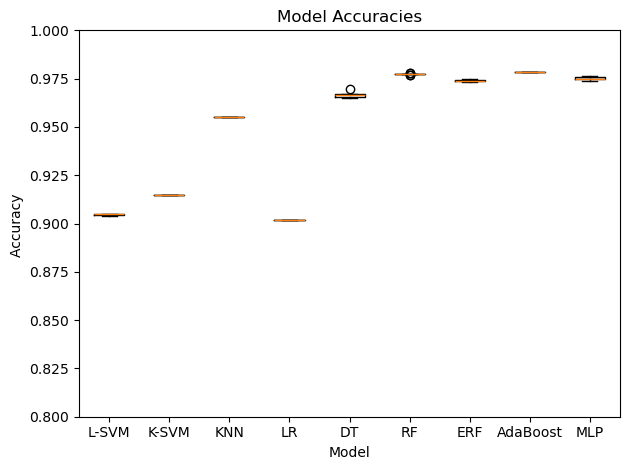

In [23]:
# models = ["LinearSVC", "SVC", "KNN", "LogisticRegression", "DecisionTree", "RandomForest", "ExtremeForest", "AdaBoost", "MLP"]
models_charts = ["L-SVM", "K-SVM", "KNN", "LR", "DT", "RF", "ERF", "AdaBoost", "MLP"]

print("Accuracy")
accuracies_t = np.transpose(accuracies)
plt.boxplot(accuracies_t)
axes = plt.gca()
axes.set_ylim([0.8, 1.0])
axes.set_xticklabels(models_charts)
plt.title(('Model Accuracies'))
#plt.legend(models)
plt.ylabel('Accuracy ')
plt.xlabel('Model')
plt.tight_layout()
plt.savefig(fname=results_folder+"/accuracy.png")
plt.show()
plt.close()


Plot Precision-Recall-FScore C0

Precision C0


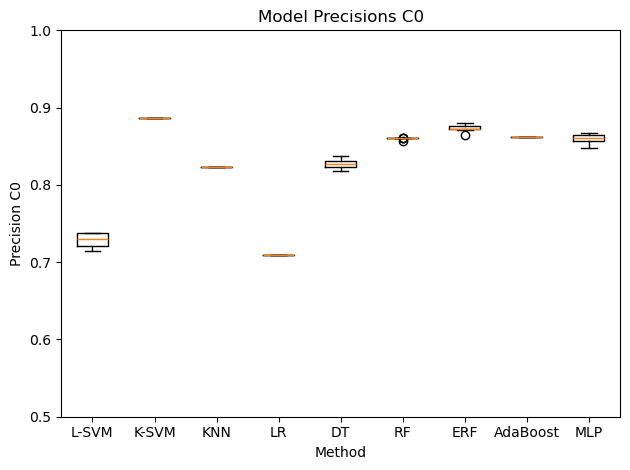

Recall C0


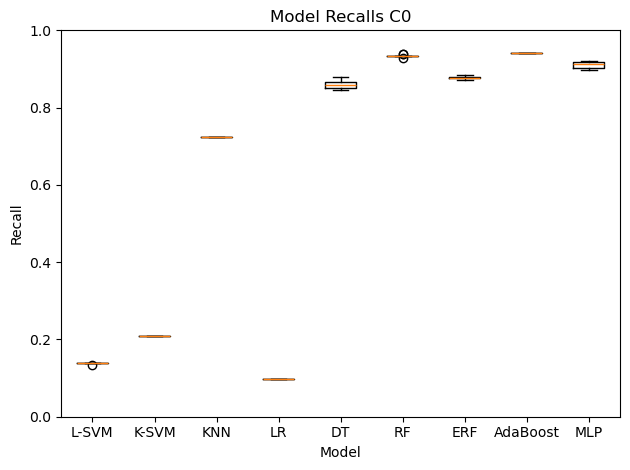

F-score C0


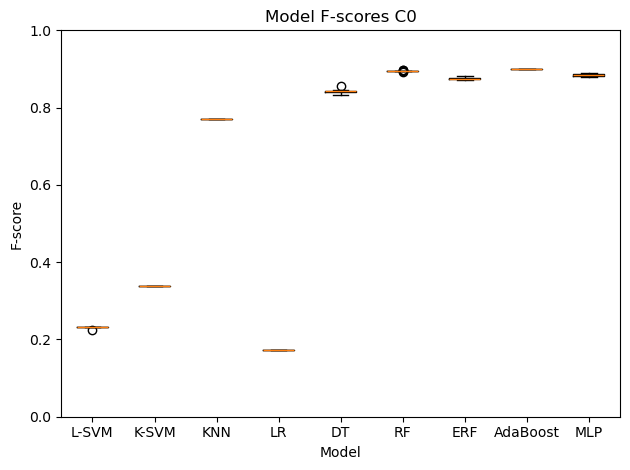

In [24]:
print("Precision C0")
precisions_t=np.transpose(C0_precisions)
plt.boxplot(precisions_t)
axes = plt.gca()
axes.set_ylim([0.5, 1.0])
axes.set_xticklabels(models_charts)
plt.title(('Model Precisions C0'))
#plt.legend(models)
plt.ylabel('Precision C0')
plt.xlabel('Method')
plt.tight_layout()
plt.savefig(fname=results_folder+"/C0_precision.png")
plt.show()
plt.close()

print("Recall C0")
recalls_t = np.transpose(C0_recalls)
plt.boxplot(recalls_t)
axes = plt.gca()
axes.set_ylim([0, 1.0])
axes.set_xticklabels(models_charts)
plt.title(('Model Recalls C0'))
#plt.legend(models)
plt.ylabel('Recall')
plt.xlabel('Model')
plt.tight_layout()
plt.savefig(fname=results_folder+"/C0_recall.png")
plt.show()
plt.close()

print("F-score C0")
fscores_t=np.transpose(C0_fscores)
plt.boxplot(fscores_t)
axes = plt.gca()
axes.set_ylim([0.0, 1.0])
axes.set_xticklabels(models_charts)
plt.title(('Model F-scores C0'))
#plt.legend(methods)
plt.ylabel('F-score')
plt.xlabel('Model')
plt.tight_layout()
plt.savefig(fname=results_folder+"/C0_f-score.png")
plt.show()
plt.close()

Plot Precision-Recall-FScore C1

Precision C1


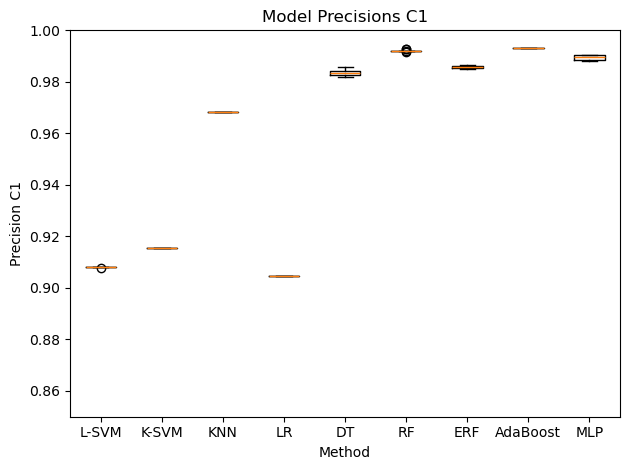

Recall C1


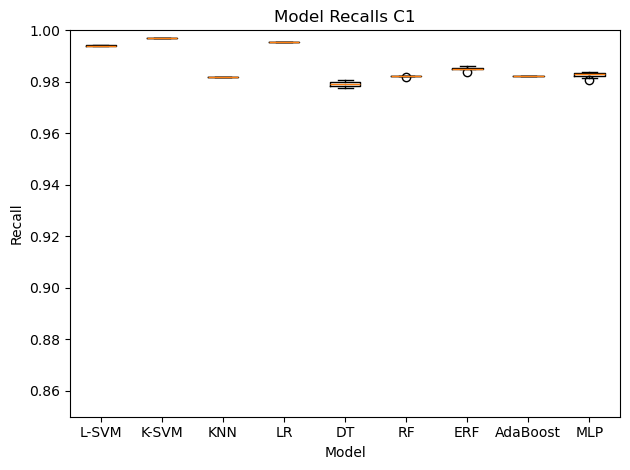

F-score C1


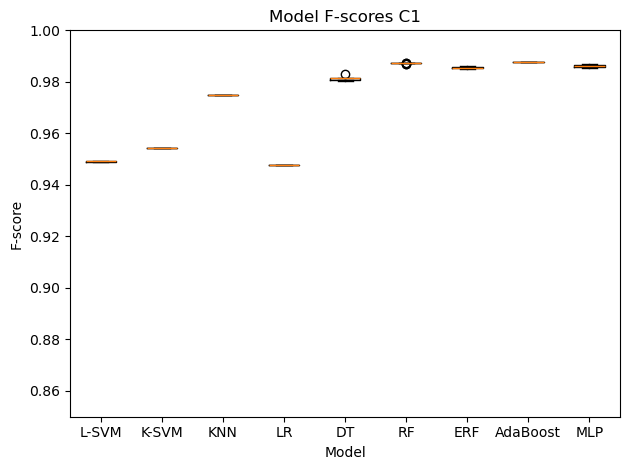

In [25]:
print("Precision C1")
precisions_t=np.transpose(C1_precisions)
plt.boxplot(precisions_t)
axes = plt.gca()
axes.set_ylim([0.85, 1.0])
axes.set_xticklabels(models_charts)
plt.title(('Model Precisions C1'))
#plt.legend(models)
plt.ylabel('Precision C1')
plt.xlabel('Method')
plt.tight_layout()
plt.savefig(fname=results_folder+"/C1_precision.png")
plt.show()
plt.close()

print("Recall C1")
recalls_t = np.transpose(C1_recalls)
plt.boxplot(recalls_t)
axes = plt.gca()
axes.set_ylim([0.85, 1.0])
axes.set_xticklabels(models_charts)
plt.title(('Model Recalls C1'))
#plt.legend(models)
plt.ylabel('Recall')
plt.xlabel('Model')
plt.tight_layout()
plt.savefig(fname=results_folder+"/C1_recall.png")
plt.show()
plt.close()

print("F-score C1")
fscores_t=np.transpose(C1_fscores)
plt.boxplot(fscores_t)
axes = plt.gca()
axes.set_ylim([0.85, 1.0])
axes.set_xticklabels(models_charts)
plt.title(('Model F-scores C1'))
#plt.legend(methods)
plt.ylabel('F-score')
plt.xlabel('Model')
plt.tight_layout()
plt.savefig(fname=results_folder+"/C1_f-score.png")
plt.show()
plt.close()

Print table in LaTex format

In [26]:
print("Model \tAccuracy \tPrecision C0 \tRecall C0 \tF-score C0 \tPrecision C1 \tRecall C1 \tF-score C1")
for model_to_try_i in range(len(models)):
    model_to_try = models[model_to_try_i]
    print("{}\t{:.1f}%\t+-{:.1f}%\t{:.1f}%\t+-{:.1f}%\t{:.1f}%\t+-{:.1f}%\t{:.1f}%\t+-{:.1f}%\t{:.1f}%\t+-{:.1f}%\t{:.1f}%\t+-{:.1f}%\t{:.1f}%\t+-{:.1f}%".format(
        model_to_try,
        accuracies_mean[model_to_try_i] * 100, accuracies_std[model_to_try_i] * 100,
        C0_precisions_mean[model_to_try_i] * 100, C0_precisions_std[model_to_try_i] * 100,
        C0_recalls_mean[model_to_try_i] * 100, C0_recalls_std[model_to_try_i] * 100,
        C0_fscores_mean[model_to_try_i] * 100, C0_fscores_std[model_to_try_i] * 100,
        C1_precisions_mean[model_to_try_i] * 100, C1_precisions_std[model_to_try_i] * 100,
        C1_recalls_mean[model_to_try_i] * 100, C1_recalls_std[model_to_try_i] * 100,
        C1_fscores_mean[model_to_try_i] * 100, C1_fscores_std[model_to_try_i] * 100,
    ))

Model 	Accuracy 	Precision C0 	Recall C0 	F-score C0 	Precision C1 	Recall C1 	F-score C1
LinearSVC	90.5%	+-0.0%	72.9%	+-0.9%	13.7%	+-0.1%	23.1%	+-0.2%	90.8%	+-0.0%	99.4%	+-0.0%	94.9%	+-0.0%
SVC	91.5%	+-0.0%	88.7%	+-0.0%	20.9%	+-0.0%	33.8%	+-0.0%	91.5%	+-0.0%	99.7%	+-0.0%	95.4%	+-0.0%
KNN	95.5%	+-0.0%	82.3%	+-0.0%	72.4%	+-0.0%	77.1%	+-0.0%	96.8%	+-0.0%	98.2%	+-0.0%	97.5%	+-0.0%
LogisticRegression	90.2%	+-0.0%	71.0%	+-0.0%	9.8%	+-0.0%	17.2%	+-0.0%	90.4%	+-0.0%	99.5%	+-0.0%	94.8%	+-0.0%
DecisionTree	96.7%	+-0.1%	82.7%	+-0.6%	85.8%	+-1.1%	84.2%	+-0.6%	98.3%	+-0.1%	97.9%	+-0.1%	98.1%	+-0.1%
RandomForest	97.7%	+-0.0%	86.0%	+-0.1%	93.4%	+-0.2%	89.6%	+-0.1%	99.2%	+-0.0%	98.2%	+-0.0%	98.7%	+-0.0%
ExtremeForest	97.4%	+-0.1%	87.3%	+-0.4%	87.7%	+-0.4%	87.5%	+-0.3%	98.6%	+-0.0%	98.5%	+-0.1%	98.5%	+-0.0%
AdaBoost	97.8%	+-0.0%	86.2%	+-0.0%	94.2%	+-0.0%	90.0%	+-0.0%	99.3%	+-0.0%	98.2%	+-0.0%	98.8%	+-0.0%
MLP	97.5%	+-0.1%	86.0%	+-0.6%	91.1%	+-0.9%	88.4%	+-0.4%	99.0%	+-0.1%	98.3%	+-0.1%	98.6%	+-0.0%
